In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from pymystem3 import Mystem
m = Mystem()



from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")# собираем стоп слова

def lemmatize_sentence(text):
    text=str(text)
    lemmas = m.lemmatize(text)
    return "".join(lemmas).strip()
# nltk.download("stopwords")

In [3]:
with open('stop-ru-words.txt', 'r') as f:
    russian_stopwords = [line.strip() for line in f]


In [7]:
# import import_ipynb
# from dbControllerPsql import DataBase
# db=DataBase(port=54320)
# comments=db.getFromTable('comments','text, user_id',"")

In [8]:
df=pd.read_csv('comments.csv') 
df=df[['user_id','text']]
df

,user_id,text
0,356567315,ждём вторую волну господа...
1,50242365,Ураааа))
2,118429745,"Всё, собираем чемоданы!"
3,390491791,"Машки и Наташки полетели на ""массаж"" к джабраи..."
4,138802909,"А потом из за таких любителей отдохнуть, пол г..."
...,...,...
241989,596993003,Уже никто не комментирует эту х...ю
241990,1284915,Вчера вы эту важнейшую информацию выложили в 1...
241991,10374092,Да срать все уже хотели на этот вирус. Куда ин...
241992,78974118,"Как вы зае...и, маску купи анализ сук сдай за ..."


In [9]:
df['text_new'] = df['text'].apply(lambda x: (lemmatize_sentence(x)))

In [10]:
df

,user_id,text,text_new
0,356567315,ждём вторую волну господа...,ждать второй волна господин...
1,50242365,Ураааа)),ураааа))
2,118429745,"Всё, собираем чемоданы!","все, собирать чемодан!"
3,390491791,"Машки и Наташки полетели на ""массаж"" к джабраи...","машка и наташка полететь на ""массаж"" к джабраи..."
4,138802909,"А потом из за таких любителей отдохнуть, пол г...","а потом из за такой любитель отдыхать, пол год..."
...,...,...,...
241989,596993003,Уже никто не комментирует эту х...ю,уже никто не комментировать этот х...ю
241990,1284915,Вчера вы эту важнейшую информацию выложили в 1...,вчера вы этот важный информация выкладывать в ...
241991,10374092,Да срать все уже хотели на этот вирус. Куда ин...,да срать все уже хотеть на этот вирус. куда ин...
241992,78974118,"Как вы зае...и, маску купи анализ сук сдай за ...","как вы зае...и, маска купить анализ сук сдават..."


In [11]:
data = df.text_new.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]
pprint(data[:1])

['ждать второй волна господин...']


In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['ждать', 'второи', 'волна', 'господин']]


In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['ждать', 'второи_волна', 'господин']


In [14]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in russian_stopwords] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
#         doc = nlp(" ".join(sent)) 
        print(sent)
        text=''.join([str(elem) for elem in sent]) 
        lemmas = m.lemmatize(text)
#         texts_out.append([token for token in lemmas])
        print("text:")
        print(text)
        print("lemmas:")
        print(lemmas)
    
        
        break
#         texts_out.append(lemmas)
    return texts_out


def lemmatization_(text):
    text=str(text)
    lemmas = m.lemmatize(text)
#     return lemmas
    return "".join(lemmas).strip()

# nlp.add_pipe(nlp.create_pipe('sentencizer'), first=True)

In [15]:
# import ru2
# nlp = ru2.load_ru2('ru2')
# print(lemmatization('какое то сообщение'))

In [16]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])
# nlp = spacy.load('ru2')
# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams)
# print(data_lemmatized[:1])

In [17]:
data_words_bigrams

[['ждать', 'второи_волна', 'господин'],
 ['ураааа'],
 ['собирать_чемодан'],
 ['машка', 'наташка', 'полететь', 'массаж', 'джабраил', 'окзон', 'бгг'],
 ['такои',
  'любитель',
  'отдыхать',
  'пол',
  'ходить',
  'маска',
  'ребенок',
  'домашнии',
  'обучение',
  'далее',
  'надоедать',
  'цирк'],
 ['ждать', 'гость', 'ковид'],
 ['чума', 'монголия', 'завозить', 'дом'],
 ['правильныи'],
 ['ага',
  'битком',
  'забивать',
  'грязныи',
  'сочи',
  'крым',
  'ничто',
  'завозить',
  'заграница',
  'прямои',
  'заразныи',
  'идиотизм',
  'крепчать'],
 ['руззка', 'шлюжок', 'собирать_чемодан'],
 [],
 ['снизу',
  'блокпост',
  'корововирус',
  'летать',
  'главное',
  'хоккеиныи',
  'игра',
  'зритель'],
 ['народ', 'улица', 'валиться', 'кв', 'заипацца'],
 ['турция', 'сеичас', 'раи'],
 ['голодныи', 'нишие', 'полететь', 'тиран', 'путин'],
 ['открываться', 'сторона', 'страна', 'снг'],
 ['нга', 'маска'],
 ['урааа', 'зарабатывать'],
 ['коронавирус'],
 ['id_евгении', 'пачка', 'прямои', 'падать', 'ага'

In [18]:
data_lemmatized=data_words_bigrams


In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_words_bigrams
# Term Document Frequency
corpus = [id2word.doc2bow((text)) for text in texts]
# View
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
id2word

In [21]:
id2word[2]

'ждать'

In [22]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('второи_волна', 1), ('господин', 1), ('ждать', 1)]]

In [23]:
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

In [24]:
# lda_model.print_topics()

In [25]:
# Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [26]:
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis

In [27]:
# import os
# os.environ.update({'MALLET_HOME':'/Users/bobon/Projects/jupyter/OTUS/project/mallet/'})
# mallet_path = "/Users/bobon/Projects/jupyter/OTUS/project/mallet/bin/mallet" # update this path
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)



In [28]:
# Show Topics
# pprint(ldamallet.show_topics(formatted=False))
# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [29]:
from gensim.models.ldamulticore import LdaMulticore

In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     import os
#     os.environ.update({'MALLET_HOME':'/Users/bobon/mallet/'})

#     mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path
    mallet_path="/Users/bobon/mallet/bin/mallet"
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        print("Ineration {}".format(num_topics))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [32]:
limit=40; start=2; step=1;

In [33]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

Ineration 2
Ineration 3
Ineration 4
Ineration 5
Ineration 6
Ineration 7
Ineration 8
Ineration 9
Ineration 10
Ineration 11
Ineration 12
Ineration 13
Ineration 14
Ineration 15
Ineration 16
Ineration 17
Ineration 18
Ineration 19
Ineration 20
Ineration 21
Ineration 22
Ineration 23
Ineration 24
Ineration 25
Ineration 26
Ineration 27
Ineration 28
Ineration 29
Ineration 30
Ineration 31
Ineration 32
Ineration 33
Ineration 34
Ineration 35
Ineration 36
Ineration 37
Ineration 38
Ineration 39


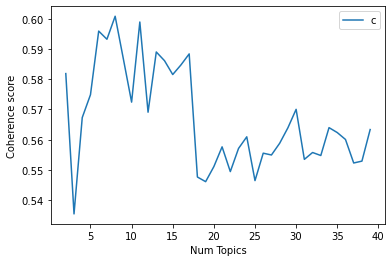

In [34]:

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [35]:
max=0
for m, cv in zip(x, coherence_values):
    if(max<round(cv, 4)):
        max=round(cv, 4)
        num=m-2
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Coherence {}. Topic number {}".format(max,num))

Num Topics = 2  has Coherence Value of 0.5819
Num Topics = 3  has Coherence Value of 0.5354
Num Topics = 4  has Coherence Value of 0.5673
Num Topics = 5  has Coherence Value of 0.5749
Num Topics = 6  has Coherence Value of 0.596
Num Topics = 7  has Coherence Value of 0.5933
Num Topics = 8  has Coherence Value of 0.6009
Num Topics = 9  has Coherence Value of 0.5867
Num Topics = 10  has Coherence Value of 0.5724
Num Topics = 11  has Coherence Value of 0.599
Num Topics = 12  has Coherence Value of 0.5691
Num Topics = 13  has Coherence Value of 0.589
Num Topics = 14  has Coherence Value of 0.5862
Num Topics = 15  has Coherence Value of 0.5816
Num Topics = 16  has Coherence Value of 0.5848
Num Topics = 17  has Coherence Value of 0.5884
Num Topics = 18  has Coherence Value of 0.5476
Num Topics = 19  has Coherence Value of 0.5461
Num Topics = 20  has Coherence Value of 0.5511
Num Topics = 21  has Coherence Value of 0.5576
Num Topics = 22  has Coherence Value of 0.5494
Num Topics = 23  has Coh

In [37]:
# model_list[4]
optimal_model=model_list[num]

In [38]:
for index, topic in optimal_model.show_topics(formatted=False, num_words=10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['nan', 'маска', 'вирус', 'коронавирус', 'вакцина', 'какои', 'народ', 'такои', 'которыи', 'заражать']
Topic: 1 
Words: ['такои', 'карантин', 'никто', 'закрывать', 'деньги', 'говорить', 'давать', 'знать', 'которыи', 'самоизоляция']
Topic: 2 
Words: ['какои', 'больница', 'сеичас', 'делать', 'тест', 'вирус', 'такои', 'заболевать', 'становиться', 'писать']
Topic: 3 
Words: ['nan', 'делать', 'какои', 'маска', 'поити', 'скоро', 'другои', 'страна', 'сидеть', 'народ']
Topic: 4 
Words: ['работать', 'какои', 'другои', 'врач', 'такои', 'пусть', 'которыи', 'сеичас', 'ничто', 'поити']
Topic: 5 
Words: ['вирус', 'такои', 'какои', 'давать', 'ребенок', 'больница', 'врач', 'жить', 'маска', 'болеть']
Topic: 6 
Words: ['маска', 'деньги', 'которыи', 'такои', 'сидеть', 'страна', 'россия', 'народ', 'дома', 'должныи']
Topic: 7 
Words: ['вообще', 'такои', 'россия', 'жить', 'помогать', 'сеичас', 'которыи', 'умирать', 'народ', 'вирус']


In [39]:

# optimal_model = model_list[2]
lda_model=optimal_model
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.013*"nan" + 0.011*"маска" + 0.011*"вирус" + 0.010*"коронавирус" + '
  '0.008*"вакцина" + 0.008*"какои" + 0.006*"народ" + 0.006*"такои" + '
  '0.006*"которыи" + 0.005*"заражать"'),
 (1,
  '0.008*"такои" + 0.008*"карантин" + 0.007*"никто" + 0.007*"закрывать" + '
  '0.007*"деньги" + 0.007*"говорить" + 0.005*"давать" + 0.005*"знать" + '
  '0.005*"которыи" + 0.004*"самоизоляция"'),
 (2,
  '0.010*"какои" + 0.006*"больница" + 0.006*"сеичас" + 0.005*"делать" + '
  '0.005*"тест" + 0.004*"вирус" + 0.004*"такои" + 0.004*"заболевать" + '
  '0.004*"становиться" + 0.004*"писать"'),
 (3,
  '0.048*"nan" + 0.009*"делать" + 0.009*"какои" + 0.007*"маска" + '
  '0.006*"поити" + 0.005*"скоро" + 0.005*"другои" + 0.005*"страна" + '
  '0.005*"сидеть" + 0.005*"народ"'),
 (4,
  '0.009*"работать" + 0.009*"какои" + 0.007*"другои" + 0.007*"врач" + '
  '0.007*"такои" + 0.005*"пусть" + 0.005*"которыи" + 0.005*"сеичас" + '
  '0.005*"ничто" + 0.005*"поити"'),
 (5,
  '0.015*"вирус" + 0.014*"такои" + 0.008*"ка

In [40]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.021942 -0.038456       1        1  15.755052
5     -0.010729 -0.015929       2        1  14.840437
6      0.005599 -0.064376       3        1  14.244399
4     -0.015815 -0.005106       4        1  13.000163
0      0.023749  0.014797       5        1  12.636520
7      0.006910 -0.027295       6        1  11.343546
2     -0.086065  0.077574       7        1   9.131246
3      0.098292  0.058790       8        1   9.048637, topic_info=            Term          Freq         Total Category  logprob  loglift
117          nan  12293.000000  12293.000000  Default  30.0000  30.0000
15         маска  11664.000000  11664.000000  Default  29.0000  29.0000
532       деньги   7620.000000   7620.000000  Default  28.0000  28.0000
76         вирус  11286.000000  11286.000000  Default  27.0000  27.0000
72   коронавирус   4684.000000   4684.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
63         путин    424.016628   3263.150344   Topic8  -5.9575   0.3619
146      которыи    529.762833   9876.471593   Topic8  -5.7349  -0.5229
113       вообще    446.519718   6176.895769   Topic8  -5.9058  -0.2245
79        россия    429.319430   6272.569985   Topic8  -5.9451  -0.2792
184     карантин    414.395268   5192.673832   Topic8  -5.9805  -0.1256

[771 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
2258       1  0.056926               be
2258       2  0.043790               be
2258       3  0.004379               be
2258       4  0.004379               be
2258       5  0.026274               be
...      ...       ...              ...
13312      7  0.940711  эксплуатировать
16130      7  0.968367             эммм
2115       8  0.917103              эхо
22142      5  0.963629           японец
32764      4  0.961889          ярмарка

[2601 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 7, 5, 1, 8, 3, 4])